In [1]:
import os
import pandas as pd
os.chdir("/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22")
from madnessReader import MadnessReader
from madnessReader import ExcitedData
from madnessReader import FrequencyData
from daltonRunner import DaltonRunner
import matplotlib.pyplot as plt
dalton_reader = DaltonRunner()

In [2]:
basis_list=['aug-cc-pVDZ','aug-cc-pVTZ','aug-cc-pVQZ','aug-cc-pV5Z','aug-cc-pV6Z']
d_basis_list=['d-aug-cc-pVDZ','d-aug-cc-pVTZ','d-aug-cc-pVQZ','d-aug-cc-pV5Z','d-aug-cc-pV6Z']

In [3]:
def create_polar_table(mol,xc,basis_list,xx):
    
    ground_dalton, response_dalton = dalton_reader.get_frequency_result(mol, 'hf', 'dipole', basis_list[0])
    freq=response_dalton['frequencies']
    g_data={}
    xx_data=[]
    for i in range(len(freq)):
        xx_data.append({})
    for basis in basis_list:
        ground_dalton, response_dalton = dalton_reader.get_frequency_result(mol, 'hf', 'dipole', basis)
        for i in range(len(freq)):
            xx_data[i][basis]=response_dalton[xx][i]
        g_data[basis]=ground_dalton['totalEnergy']
    g_df=pd.Series(g_data)
    g_df.name='Total HF Energy'
    names=[]
    for f in freq:
        raw_f = r'{}'.format(str(f)) 
        #names.append(r'$$\alpha_{xx}('+raw_f+r')$$')
        names.append('a('+'{:.3f}'.format(f)+')')
    r_dfs=[]
    for i in range(len(freq)):
        r_dfs.append(pd.Series(xx_data[i]))
        r_dfs[i].name=names[i]
    dalton_df=pd.concat([g_df]+r_dfs,axis=1)

    moldata=FrequencyData(mol,'hf','dipole')
    moldata.polar_df[xx]
    mad_data_e={}
    mad_data_r={}
    mad_data_e['Total HF Energy']=moldata.ground_e['e_tot']

    for i in range(len(names)):
        mad_data_r[names[i]]=moldata.polar_df[xx][i]
    
    mad_data_e=pd.Series(mad_data_e)
    mad_data_r=pd.Series(mad_data_r)
    
    mad_data=pd.concat([mad_data_e,mad_data_r],axis=0)
    mad_data.name='MRA'
    return dalton_df.append(mad_data)
    
    return dalton_df

def create_data(mol,basis_list):
    
    res_dict={'xx':'density_residualX','yy':'density_residualY','zz':'density_residualZ'}
    
    
    moldata=FrequencyData(mol,'hf','dipole')
    xx=['xx','yy','zz']
    data=[]
    for x in xx:
        data.append(create_polar_table(mol,'hf',basis_list,x))
    average=(data[0]+data[1]+data[2])/3
    
    diff_data=average-average.loc['MRA']
    diff_data=diff_data.drop(index='MRA')
    
    polar_diff=diff_data.drop('Total HF Energy',axis=1)
    
    residuals=moldata.final_density_residuals()
    
    cleanX=residuals['density_residualX'].reset_index().drop('index',axis=1)
    cleanY=residuals['density_residualY'].reset_index().drop('index',axis=1)
    cleanZ=residuals['density_residualZ'].reset_index().drop('index',axis=1)
    
    cleanX.rename(columns={'density_residualX':'MRA density residual'},inplace=True)
    cleanY.rename(columns={'density_residualY':'MRA density residual'},inplace=True)
    cleanZ.rename(columns={'density_residualZ':'MRA density residual'},inplace=True)
    clean=(cleanX+cleanY+cleanZ)/3
    clean.index=polar_diff.T.index
    
    average=average.append(clean.T)
    average.name='Average Polarizability'
    
    
    energy_diff=diff_data['Total HF Energy']
    return average,diff_data,energy_diff,polar_diff



def create_polar_diff_plot(mol,basis_list):
    
    
    title=mol
    yl=r' $\Delta\alpha_{avg}$'+r' (MRA - BASIS)'
    
    
    data,diff_data,energy_diff,polar_diff=create_data(mol,basis_list)
    polar_diff.iloc[:,:].plot(marker='o', linestyle='solid')
    plt.axhline(linewidth=2,ls='--',color='k',label="MRA Reference")
    plt.xlabel
    plt.legend(fontsize=12)
    plt.xticks(fontsize=14,rotation = 20)
    plt.title(title,fontsize=20)
    plt.ylabel(yl, fontsize=14)
    save=mol+'-'+basis_list[0]
    if not os.path.exists("figures"):
        os.mkdir("figures")
    if not os.path.exists("tables"):
        os.mkdir("tables")
    save='figures/'+save+'.svg'
    plt.savefig(save)
    
    latex_save=mol+'-'+basis_list[0]
    latex_save='tables/'+latex_save+'.tex'
    data=data.round(decimals=3)
    data.to_latex(latex_save,na_rep=' ')
    
    return data


C2H2
He
HF
NH3
Ne
H2
HCl
H2O
C6H6
CH4
BeH2
Be


{'C2H2':                       Total HF Energy  a(0.000)  a(0.014)  a(0.027)  a(0.055)  \
 aug-cc-pVDZ                   -76.828    22.801    22.821    22.882    23.133   
 aug-cc-pVTZ                   -76.850    23.333    23.354    23.419    23.685   
 aug-cc-pVQZ                   -76.855    23.407    23.429    23.496    23.766   
 MRA                           -76.855    23.423    23.445    23.513    23.782   
 MRA density residual              NaN     0.000     0.000     0.000     0.000   
 
                       a(0.110)  
 aug-cc-pVDZ             24.223  
 aug-cc-pVTZ             24.840  
 aug-cc-pVQZ             24.945  
 MRA                     24.972  
 MRA density residual     0.000  ,
 'He':                       Total HF Energy  a(0.000)  a(0.049)  a(0.099)  a(0.198)  \
 aug-cc-pVDZ                    -2.856     1.304     1.307     1.315     1.351   
 aug-cc-pVTZ                    -2.861     1.316     1.319     1.329     1.369   
 aug-cc-pVQZ                    -2.862   

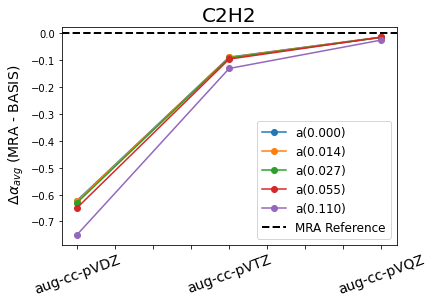

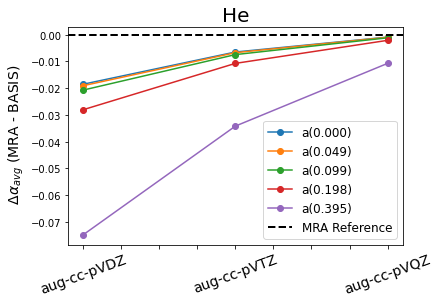

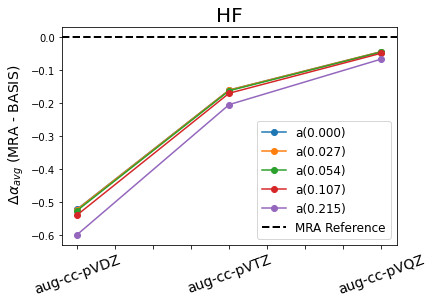

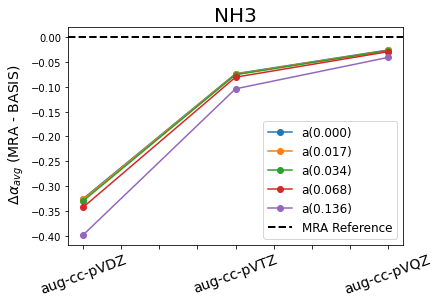

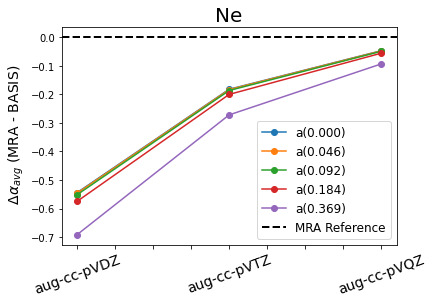

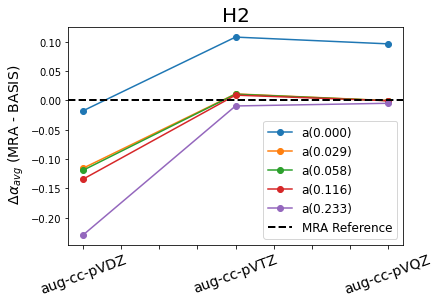

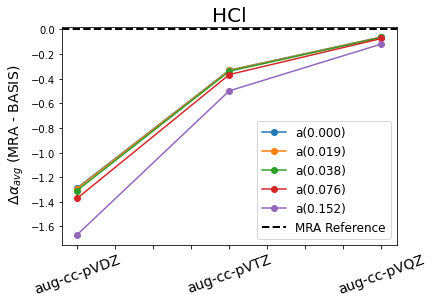

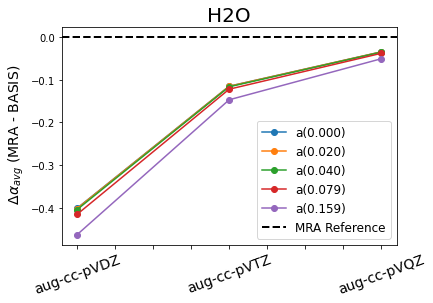

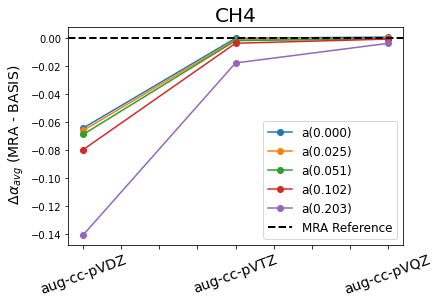

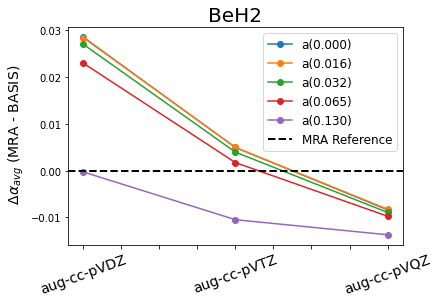

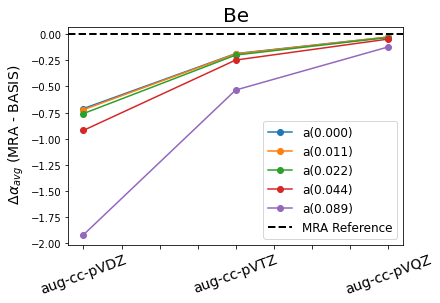

In [9]:
import glob
def polar_comparison_plots(basis):
    
    data={}
    for g in glob.glob('molecules/*.mol'):
        m=g.split('/')
        mol=m[1].split('.')[0]
        print(mol)
        if mol!='C6H6':
            data[mol]=create_polar_diff_plot(mol,basis)
    return data

basis_list=['aug-cc-pVDZ','aug-cc-pVTZ','aug-cc-pVQZ']
polar_comparison_plots(basis_list)

In [14]:
def create_freq_series(mol,basis_list):
    
    fdata=FrequencyData(mol,'hf','dipole')
    print(fdata.full_polar)
create_freq_series('Be','aug-cc-pVQZ')

{}


In [22]:
create_polar_table('Be','hf',basis_list,['xx','yy','zz'])

KeyError: 0

In [50]:

moldata=FrequencyData('Be','hf','dipole')
moldata.polar_df[xx]
mad_data_e={}
mad_data_r={}
mad_data_e['Total HF Energy']=moldata.ground_e['e_tot']

for i in range(len(names)):
    mad_data_r[names[i]]=moldata.polar_df[xx][i]

mad_data_e=pd.Series(mad_data_e)
mad_data_r=pd.Series(mad_data_r)

mad_data=pd.concat([mad_data_e,mad_data_r],axis=0)
mad_data.name='MRA'

NameError: name 'names' is not defined

In [162]:
def create_mol_series(mol,basis):
    data=FrequencyData(mol,'hf','dipole')
    converged=data.converged
    freq=pd.Series(converged.keys())
    print(freq)
    print(freq.size)
    
    mra_keys=['HF Energy']
    diff_keys=[basis]
    conv_keys=[]
    for f in range(freq.size):
        mra_keys.append('avg_{d}'.format(d=f))
        diff_keys.append('diff_{d}'.format(d=f))
        conv_keys.append('converged_{d}'.format(d=f))
    
    xx=['xx','yy','zz']
    data=[]
    for x in xx:
        data.append(create_polar_table(mol,'hf',[basis],x))
    average=(data[0]+data[1]+data[2])/3
    mra=average.loc['MRA']
    basis_value=average.loc[basis]
    diff=mra-basis_value
    avg_diff=diff.mean()
    print(avg_diff)
    avg_diff=pd.Series(avg_diff)
    avg_diff.index=['average diff']
    mra.index=mra_keys
    diff.index=diff_keys
    converged.index=conv_keys
    new=pd.concat([freq,mra,pd.Series(avg_diff),converged],axis=0)
    
    return new


In [163]:
create_mol_series('Be','d-aug-cc-pVQZ')

0             0.0
1    0.0111163125
2     0.022232625
3      0.04446525
4       0.0889305
dtype: object
5
0.04047208378002942


0                        0.0
1               0.0111163125
2                0.022232625
3                 0.04446525
4                  0.0889305
HF Energy         -14.572937
avg_0              45.625335
avg_1              45.802886
avg_2              46.346904
avg_3              48.658667
avg_4              60.821554
average diff        0.040472
converged_0             True
converged_1             True
converged_2             True
converged_3             True
converged_4             True
dtype: object

In [164]:

def polar_overview(basis):
    
    data={}
    for g in glob.glob('molecules/*.mol'):
        m=g.split('/')
        mol=m[1].split('.')[0]
        print(mol)
        if mol!='C6H6':
            data[mol]=create_mol_series(mol,basis)
    
    return pd.DataFrame(data)


In [165]:
polar_overview('d-aug-cc-pVQZ')

C2H2
0         0.0
1    0.013717
2    0.027434
3    0.054868
4    0.109736
dtype: object
5
-0.00016564381726761704
He
0          0.0
1    0.0494175
2     0.098835
3      0.19767
4      0.39534
dtype: object
5
0.00013885321462222175
HF
0             0.0
1    0.0268659375
2     0.053731875
3      0.10746375
4       0.2149275
dtype: object
5
-0.003323561103203717
NH3
0           0.0
1    0.01704725
2     0.0340945
3      0.068189
4      0.136378
dtype: object
5
0.0021693425293352795
Ne
0            0.0
1    0.046122125
2     0.09224425
3      0.1844885
4       0.368977
dtype: object
5
-0.002738540753793132
H2
0           0.0
1    0.02909175
2     0.0581835
3      0.116367
4      0.232734
dtype: object
5
-0.01359478475833146
HCl
0             0.0
1    0.0190176875
2     0.038035375
3      0.07607075
4       0.1521415
dtype: object
5
0.029152694027657706
H2O
0             0.0
1    0.0198666875
2     0.039733375
3      0.07946675
4       0.1589335
dtype: object
5
-0.0010202273834307718
C6H6


,C2H2,He,HF,NH3,Ne,H2,HCl,H2O,CH4,BeH2,Be
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.013717,0.0494175,0.0268659375,0.01704725,0.046122125,0.02909175,0.0190176875,0.0198666875,0.0253930625,0.016219125,0.0111163125
2,0.027434,0.098835,0.053731875,0.0340945,0.09224425,0.0581835,0.038035375,0.039733375,0.050786125,0.03243825,0.022232625
3,0.054868,0.19767,0.10746375,0.068189,0.1844885,0.116367,0.07607075,0.07946675,0.10157225,0.0648765,0.04446525
4,0.109736,0.39534,0.2149275,0.136378,0.368977,0.232734,0.1521415,0.1589335,0.2031445,0.129753,0.0889305
HF Energy,-76.85538,-2.861612,-100.070651,-56.22465,-128.546998,-1.133494,-460.112667,-76.067217,-40.216706,-15.773011,-14.572937
avg_0,23.422847,1.322424,4.908916,12.96321,2.376626,5.13276,16.781521,8.543102,15.993997,19.011703,45.625335
avg_1,23.445275,1.325838,4.914731,12.978079,2.38114,5.244861,16.803868,8.552144,16.027907,19.045734,45.802886
avg_2,23.512569,1.336159,4.933736,13.021517,2.394761,5.291901,16.870553,8.580325,16.128028,19.149725,46.346904
avg_3,23.782253,1.379426,5.011805,13.200828,2.451825,5.489385,17.145797,8.696859,16.544071,19.576814,48.658667
